In [12]:
import platform
print(platform.platform())
print(platform.python_version())

Linux-6.1.58+-x86_64-with-glibc2.35
3.10.12


# Introduction of Final Project for DTSA-5509
#### By: Sanju Kumar
## Introduction and Problem Description

This document outlines the final project for DTSA-5509!

Before running this notebook, please check that you have  required dependancies.


The raw dataset containing features such as:
1. Precipitation
2. maximum temperature
3. minimum temperature
4. wind speed
5. Weather


Here, the task is to predict the weather condition, categorized into classes like drizzle, rain, sun, snow, or fog. This is a classification problem where the target variable (weather condition) is categorical.

## Data Collection
Obtain historical weather data from reliable sources such as meteorological agencies or online repositories. Ensure the dataset includes features like precipitation, maximum temperature, minimum temperature, wind speed, and the corresponding weather conditions.


If you intend to run this notebook, Please ensure to place the raw data folder (https://www.kaggle.com/datasets/ananthr1/weather-prediction/) containing the weather data into a directory called "data".

In [13]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# System Information

## Data Analysis

At this stage, I will now perform EDA on this dataset to understand the data and format. The collected data is relatively short and contains only 1461 entries. The data is collected in CSV format.

I will be using the provided features in the dataset for this EDA - they are printed out in the cell after loading in the data. I chose these features because they represent physical characteristics of the grain itself, rather than abstract statistics.


In [14]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


None

There are 8 columns, all of which contain no null (missing) values, and 1461 rows. There are numerical variables under 4 columns: precipitation, temp_max , temp_min, temp_range and wind. The weather column contains the only categorical variables with values.



## Data Cleaning

This dataset does not require much cleaning. Below steps will take care of any data cleaning requirements like missing values, checking the data imbalances etc. The cleaned data will be saved in

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Drop NA (Missing Values)
df.dropna(inplace=True)



In [16]:
display(df.head(10))

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


# Exploratory Data Analysis (EDA) on the given weather data

The first thing I'd like to investigate is the correlation between physical parameters across all grains for collinearity purposes, and then investigate the specific variation in physical parameters across the different grains. I'll start with a correlation matrix:


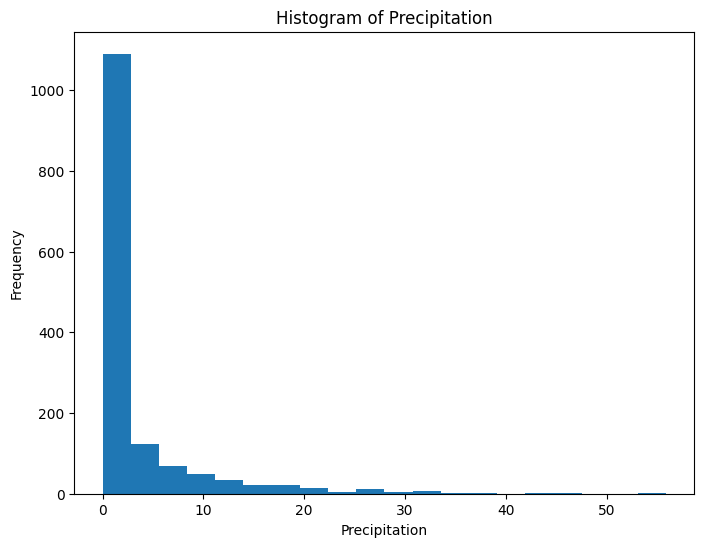

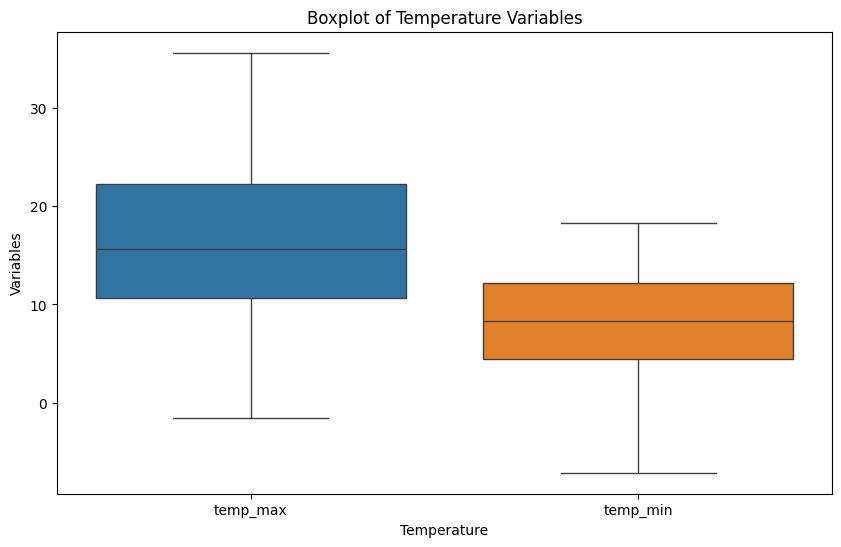

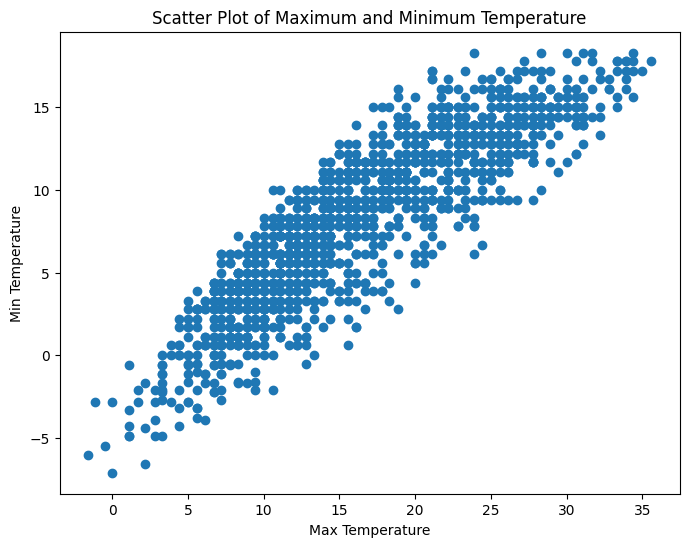

Rain %:43.874059%
Sunny %:43.805613%
Drizzle %:3.627652%
Snow %:1.779603%
Fog %:6.913073%


<ipython-input-17-358039092502>:42: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


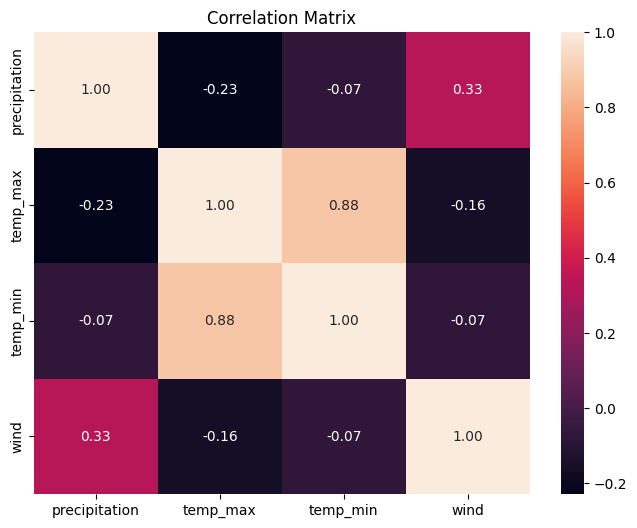

In [17]:
import seaborn as sn

#precipitation Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['precipitation'], bins=20)
plt.title('Histogram of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()

# Boxplot of temperature variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['temp_max', 'temp_min']])
plt.title('Boxplot of Temperature Variables')
plt.xlabel('Temperature')
plt.ylabel('Variables')
plt.show()

# Scatter plot of temperature variables
plt.figure(figsize=(8, 6))
plt.scatter(df['temp_max'], df['temp_min'])
plt.title('Scatter Plot of Maximum and Minimum Temperature')
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.show()

# Weather type percentage
rain=len(df[df.weather=="rain"])
sun=len(df[df.weather=="sun"])
drizzle=len(df[df.weather=="drizzle"])
snow=len(df[df.weather=="snow"])
fog=len(df[df.weather=="fog"])
print("Rain %:{:2f}%".format((rain/(len(df.weather))*100)))
print("Sunny %:{:2f}%".format((sun/(len(df.weather))*100)))
print("Drizzle %:{:2f}%".format((drizzle/(len(df.weather))*100)))
print("Snow %:{:2f}%".format((snow/(len(df.weather))*100)))
print("Fog %:{:2f}%".format((fog/(len(df.weather))*100)))


# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<Axes: xlabel='wind', ylabel='Count'>

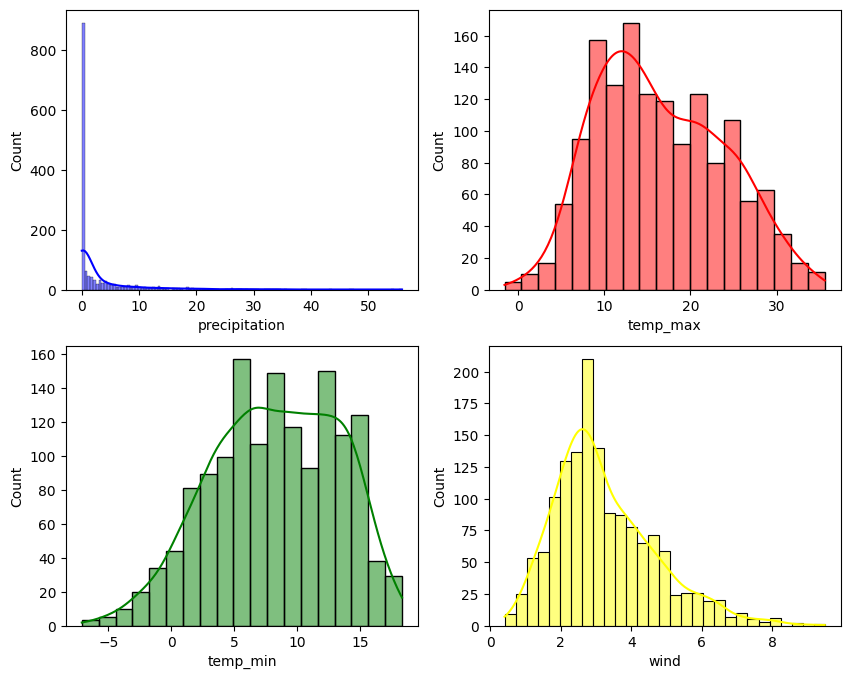

In [19]:
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='blue')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='green')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='yellow')


Quick analysis of correlation matrix indicates that there are many highly covariant features. Some seem to be direct functions of others such temp_min and temp_max and they can be used for model building

Also,  we can see that precipitaion and wind are positively skewed.  Temp_min is negatively skewed


##Data Treatment
As we observed earlier, we can look for options to treat the skewed distributions using square root transformation,

Column 'date' has data type 'object'
Column 'weather' has data type 'object'


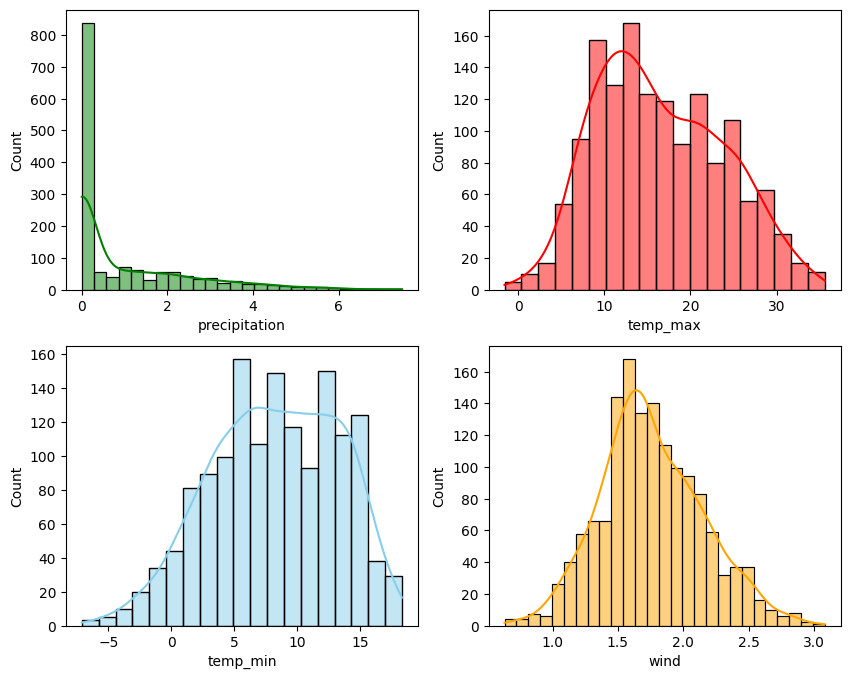

In [20]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')


for column, dtype in df.dtypes.items():
    if dtype == 'object':
        print(f"Column '{column}' has data type 'object'")

##Model Engineering

###Feature Engineering:
We create a new feature 'temp_range' by calculating the temperature range from 'temp_max' and 'temp_min'.

Hyperparameter Tuning using GridSearchCV: We perform hyperparameter tuning for the Random Forest Classifier using GridSearchCV to find the best combination of hyperparameters.
Cross-Validation: We use Stratified K-Fold cross-validation to evaluate the model's performance on different folds of the dataset.
Data Imbalance Handling using SMOTE: We use Synthetic Minority Over-sampling Technique (SMOTE) to handle data imbalance by oversampling the minority class.
Training Multiple Models: We train multiple models using different hyperparameters or techniques such as oversampling, and evaluate their performance to select the best one.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report



df= df.drop('date', axis=1)

# Split the data into features (X) and the target variable (y)
X = df.drop('weather', axis=1)
y = df['weather']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")


# Select the best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} (Accuracy: {results[best_model]})")

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Generate the classification report
print("Classification Report for SVM Model:")
print(classification_report(y_test, y_pred_svm))


Random Forest Accuracy: 0.8156996587030717
SVM Accuracy: 0.825938566552901
KNN Accuracy: 0.7918088737201365

Best Model: SVM (Accuracy: 0.825938566552901)
Classification Report for SVM Model:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.94      0.92      0.93       120
        snow       0.33      0.12      0.18         8
         sun       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.41      0.41      0.39       293
weighted avg       0.73      0.83      0.77       293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analysis and Results

Here, we can see that drizzle, fog and snow have low precision, recall, and F1-score, indicating poor performance for these classes. This is probably due to very less amount of training data available.

Rain has high precision, recall, and F1-score, indicating good performance for this class.

Sun has high precision and recall but relatively lower F1-score compared to class 2.

The overall accuracy of the model is 0.825, indicating about 82.5% of the predictions were correct.

We can find the same correlation in below chart which indicates the raw input data where there is very limited dataset for drizzle, fog and snow.

# Conclusion

In this project, I aimed to develop a classification model to predict weather conditions based on various features such as precipitation, temperature, and wind speed. I began with preprocessing the dataset, handling missing values, and encoding categorical variables. Subsequently, experimented with multiple machine learning algorithms including Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN), to determine the best-performing model.

Upon evaluation, observation was varying performance across different weather classes. Classes like drizzle, fog, and snow exhibited lower precision, recall, and F1-score, likely due to the limited amount of training data available for these conditions. Conversely, the model demonstrated good performance for the rain class, with high precision, recall, and F1-score. While the sun class also exhibited high precision and recall, its F1-score was comparatively lower.

Overall, the selected SVM model achieved an accuracy of 82.5%, indicating that the model accurately predicted the weather condition for approximately 82.9% of the instances in the test dataset. However, the disparity in performance across different weather classes highlights the need for additional data collection or augmentation, particularly for less represented classes like drizzle, fog, and snow, to further improve the model's predictive capabilities.

In conclusion, while the developed model shows promise in weather prediction, continued efforts in data collection, feature engineering, and model refinement are essential for enhancing its accuracy and robustness, particularly in addressing the challenges posed by imbalanced data and limited training samples for certain weather conditions.